#biar cepet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [2]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


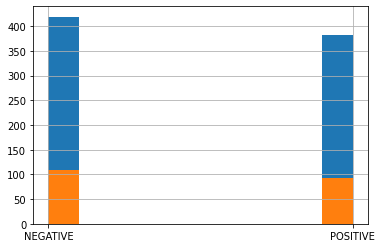

In [3]:
#Diagram Untuk melihat Perbandingan antara Class data data training dan testing  dan pembuatan data testing pada Test size sebesar 0.2 atau 20% dan otomatis data training 0.8 80%
x_train, x_test, y_train, y_test = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)
y_train.hist()
y_test.hist()

In [4]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(y_train)
test_y = Encoder.transform(y_test)

In [5]:
#membuat CountVectorizer dengan menggunakan Unigram+bigram
cv = CountVectorizer(ngram_range=(2,2)) #1 = uni // 2 = bi // 3 = tri
cv.fit_transform(x_train)
len(cv.get_feature_names_out())

9909

In [6]:
print("Vocabulary: ", cv.vocabulary_)

Vocabulary:  {'tokopedia repot': 9159, 'repot seleksi': 7477, 'seleksi orang': 7948, 'orang buka': 6356, 'buka toko': 1952, 'toko beli': 8863, 'beli barang': 1602, 'barang kirim': 1010, 'kirim produk': 4678, 'produk kirim': 7118, 'kirim sesuai': 4698, 'sesuai prosedur': 8073, 'prosedur prosedur': 7262, 'prosedur susah': 7263, 'susah pesan': 8407, 'pesan sedia': 6880, 'sedia barang': 7916, 'barang member': 1030, 'member gold': 5681, 'gold silver': 3121, 'silver turun': 8158, 'turun hapus': 9462, 'hapus pasang': 3385, 'beli bayar': 1605, 'bayar alfamart': 1271, 'alfamart kena': 224, 'kena biaya': 4418, 'biaya administrasi': 1776, 'administrasi bayar': 28, 'bayar menit': 1352, 'menit transaksi': 5708, 'transaksi batal': 9310, 'batal tokopedia': 1231, 'tokopedia dana': 8988, 'dana ubah': 2417, 'ubah cair': 9522, 'cair saldo': 2061, 'saldo kembali': 7770, 'kembali rekening': 4385, 'rekening pindah': 7438, 'pindah dompet': 6965, 'dompet digital': 2624, 'digital tokopedia': 2568, 'tokopedia a

In [7]:
#memanggil Nama fitur
gf = cv.get_feature_names_out()
print(gf)

['abai abai' 'abai administrasi' 'abai baik' ... 'youtube pesan'
 'zakat suka' 'zoning jaring']


In [8]:
X_train = cv.fit_transform(x_train)
X_test = cv.transform(x_test)

In [9]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 9909)
X_test_shape :  (200, 9909)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [10]:
print("x_train : \n",X_train)
print("\n x_test : \n",X_test)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 9159)	1
  (0, 7477)	1
  (0, 7948)	1
  (0, 6356)	1
  (0, 1952)	1
  (0, 8863)	1
  (0, 1602)	1
  (0, 1010)	1
  (0, 4678)	1
  (0, 7118)	1
  (0, 4698)	1
  (0, 8073)	1
  (0, 7262)	1
  (0, 7263)	1
  (0, 8407)	1
  (0, 6880)	1
  (0, 7916)	1
  (0, 1030)	1
  (0, 5681)	1
  (0, 3121)	1
  (0, 8158)	1
  (0, 9462)	1
  (0, 3385)	1
  (1, 1605)	1
  (1, 1271)	1
  :	:
  (798, 8596)	1
  (798, 3639)	1
  (798, 7887)	1
  (798, 9503)	1
  (798, 2579)	1
  (798, 1623)	1
  (798, 2945)	1
  (798, 603)	1
  (798, 8227)	1
  (799, 8486)	2
  (799, 3967)	2
  (799, 6233)	1
  (799, 5719)	2
  (799, 4514)	1
  (799, 2829)	1
  (799, 5982)	1
  (799, 6110)	1
  (799, 2281)	1
  (799, 1872)	1
  (799, 8262)	1
  (799, 4518)	1
  (799, 8166)	1
  (799, 6005)	1
  (799, 9689)	1
  (799, 2066)	1

 x_test : 
   (0, 8337)	1
  (1, 445)	1
  (1, 1090)	1
  (1, 4314)	1
  (1, 7956)	1
  (1, 8691)	1
  (1, 9160)	1
  (2, 66)	1
  (2, 826)	1
  (2, 2671)	1
  (2, 2680)	1
  (2, 3201)	1
  (2, 4144)	1
  (2, 6332)	1
  (3, 768)	1
  (3, 1581)	1
 

#Multinomial Naive Bayes

In [11]:
MNB = MultinomialNB()
MNB.fit(X_train, train_y)

MultinomialNB()

In [12]:
scores = cross_val_score(MNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, X_train, train_y, cv=10).mean())

[0.7875 0.725  0.7125 0.7375 0.7375 0.7625 0.7375 0.85   0.7125 0.7125]
K-Fold Mean ->  0.7475000000000002


In [13]:
MNB_pred = MNB.predict(X_test)

In [14]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[89 16]
 [19 76]]
MNB Accuracy Score ->  82.5
MNB Recall Score ->  82.6086956521739
MNB Precision Score ->  80.0
MNB f1 Score ->  81.28342245989306


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       108
           1       0.80      0.83      0.81        92

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200


Confusion Matrix:


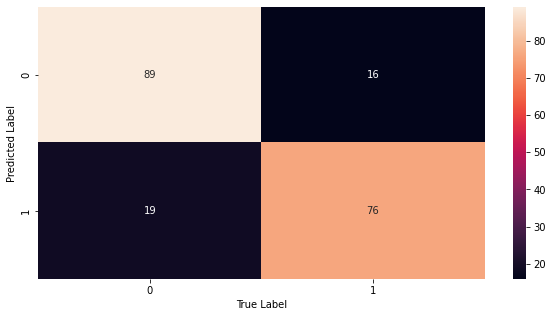



True Positive :  76
True Negative :  89
False Positive :  19
False Negative  :  16


In [15]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [16]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.175


In [17]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_svm

,prediksi
0,52.50%
1,47.50%


#Bernoulli Naive Bayes

In [18]:
BNB = BernoulliNB()
BNB.fit(X_train, train_y)

BernoulliNB()

In [19]:
scores = cross_val_score(BNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, X_train, train_y, cv=10).mean())

[0.75   0.725  0.675  0.6875 0.675  0.7375 0.6875 0.7625 0.675  0.7   ]
K-Fold Mean ->  0.7075


In [20]:
BNB_pred = BNB.predict(X_test)

In [21]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[70  9]
 [38 83]]
BNB Accuracy Score ->  76.5
BNB Recall Score ->  90.21739130434783
BNB Precision Score ->  68.59504132231406
BNB f1 Score ->  77.9342723004695


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       108
           1       0.69      0.90      0.78        92

    accuracy                           0.77       200
   macro avg       0.79      0.78      0.76       200
weighted avg       0.79      0.77      0.76       200


Confusion Matrix:


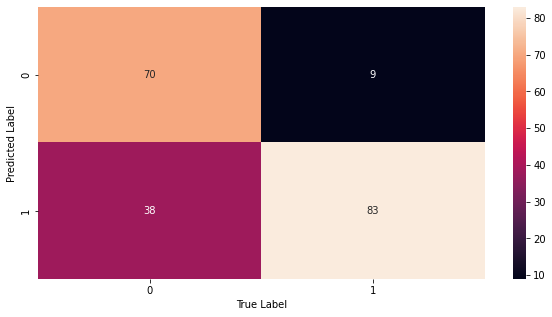



True Positive :  83
True Negative :  70
False Positive :  38
False Negative  :  9


In [22]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [23]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.235


In [24]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_svm

,prediksi
1,60.50%
0,39.50%


#Hitung nilai C

In [25]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(X_train, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(X_test)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.655
Accuracy fot C=0.25: 0.57
Accuracy fot C=0.5: 0.605
Accuracy fot C=1: 0.65
Accuracy fot C=1.01: 0.65
Accuracy fot C=1.05: 0.65
Accuracy fot C=1.25: 0.65
Accuracy fot C=1.5: 0.66
Accuracy fot C=2: 0.675
Accuracy fot C=2.01: 0.675
Accuracy fot C=2.05: 0.675
Accuracy fot C=2.25: 0.675
Accuracy fot C=2.5: 0.675
Accuracy fot C=3: 0.68


# Linear

In [26]:
linear = SVC(kernel='linear', C=3)
linear.fit(X_train, train_y)

SVC(C=3, kernel='linear')

In [27]:
scores = cross_val_score(linear, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,X_train, train_y, cv=10).mean())

[0.8625 0.9    0.7375 0.725  0.775  0.825  0.775  0.8375 0.725  0.7875]
K-Fold Mean ->  0.7949999999999999


In [28]:
linear_pred = linear.predict(X_test)

In [29]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[73  9]
 [35 83]]
SVM Accuracy Score ->  78.0
SVM Recall Score ->  90.21739130434783
SVM Precision Score ->  70.33898305084746
SVM f1 Score ->  79.04761904761905


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       108
           1       0.70      0.90      0.79        92

    accuracy                           0.78       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.80      0.78      0.78       200


Confusion Matrix:


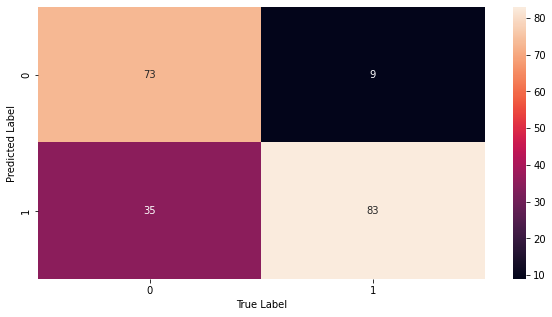



True Positive :  83
True Negative :  73
False Positive :  35
False Negative  :  9


In [30]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [31]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.22


In [32]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_svm

,prediksi
1,59.00%
0,41.00%


# Polynomial 

In [33]:
poly = SVC(kernel='poly', C=3)
poly.fit(X_train, train_y)

SVC(C=3, kernel='poly')

In [34]:
scores = cross_val_score(poly, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,X_train, train_y, cv=10).mean())

[0.475  0.475  0.475  0.475  0.475  0.475  0.475  0.475  0.475  0.4875]
K-Fold Mean ->  0.47624999999999995


In [35]:
poly_pred = poly.predict(X_test)

In [36]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[  1   0]
 [107  92]]
SVM Accuracy Score ->  46.5
SVM Recall Score ->  100.0
SVM Precision Score ->  46.231155778894475
SVM f1 Score ->  63.230240549828174


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       108
           1       0.46      1.00      0.63        92

    accuracy                           0.47       200
   macro avg       0.73      0.50      0.33       200
weighted avg       0.75      0.47      0.30       200


Confusion Matrix:


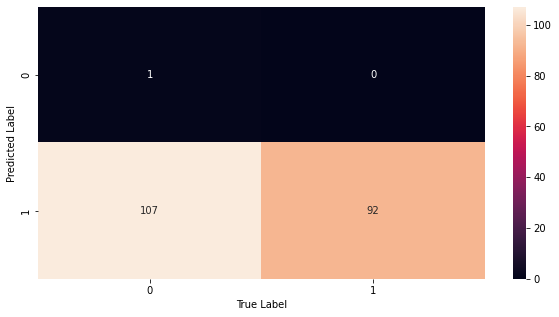



True Positive :  92
True Negative :  1
False Positive :  107
False Negative  :  0


In [37]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [38]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.535


In [39]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_svm

,prediksi
1,99.50%
0,0.50%


# Radial Basis Function

In [40]:
rbf = SVC(kernel='rbf', C=3, gamma=0.50 )
rbf.fit(X_train, train_y)

SVC(C=3, gamma=0.5)

In [41]:
scores = cross_val_score(rbf, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,X_train, train_y, cv=10).mean())

[0.625  0.575  0.6    0.5875 0.525  0.6125 0.575  0.6    0.575  0.5125]
K-Fold Mean ->  0.5787500000000001


In [42]:
rbf_pred = rbf.predict(X_test)

In [43]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[62 34]
 [46 58]]
SVM Accuracy Score ->  60.0
SVM Recall Score ->  63.04347826086957
SVM Precision Score ->  55.769230769230774
SVM f1 Score ->  59.18367346938776


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       108
           1       0.56      0.63      0.59        92

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.61      0.60      0.60       200


Confusion Matrix:


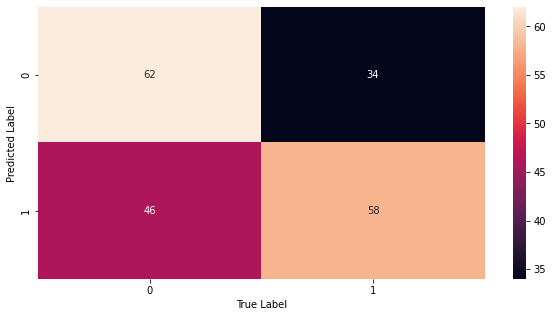



True Positive :  58
True Negative :  62
False Positive :  46
False Negative  :  34


In [44]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [45]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.4


In [46]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_svm

,prediksi
1,52.00%
0,48.00%


# Sigmoid

In [47]:
sig = SVC(kernel='sigmoid', C=3)
sig.fit(X_train, train_y)

SVC(C=3, kernel='sigmoid')

In [48]:
scores = cross_val_score(sig, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,X_train, train_y, cv=10).mean())

[0.8625 0.9125 0.7875 0.75   0.7875 0.8375 0.8125 0.875  0.7625 0.8375]
K-Fold Mean ->  0.8225


In [49]:
sig_pred = sig.predict(X_test)

In [50]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[78 12]
 [30 80]]
SVM Accuracy Score ->  79.0
SVM Recall Score ->  86.95652173913044
SVM Precision Score ->  72.72727272727273
SVM f1 Score ->  79.20792079207921


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       108
           1       0.73      0.87      0.79        92

    accuracy                           0.79       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200


Confusion Matrix:


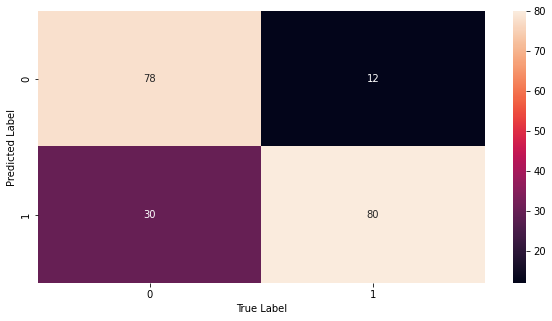



True Positive :  80
True Negative :  78
False Positive :  30
False Negative  :  12


In [51]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [52]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.21


In [53]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_svm

,prediksi
1,55.00%
0,45.00%
